In [64]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import express as p

In [65]:
data = pd.read_csv('melbourne.csv')
data.shape

(13518, 10)

In [66]:
data.head()

,Suburb,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
0,Abbotsford,2,h,1480000,2,1,1,202,Yarra,Northern Metropolitan
1,Abbotsford,2,h,1035000,2,1,0,156,Yarra,Northern Metropolitan
2,Abbotsford,3,h,1465000,3,2,0,134,Yarra,Northern Metropolitan
3,Abbotsford,3,h,850000,3,2,1,94,Yarra,Northern Metropolitan
4,Abbotsford,4,h,1600000,3,1,2,120,Yarra,Northern Metropolitan


- Let's check the last five rows from data

In [67]:
data.tail()

,Suburb,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
13513,Wheelers Hill,4,h,1245000,4,2,2,652,NaN,South-Eastern Metropolitan
13514,Williamstown,3,h,1031000,3,2,2,333,NaN,Western Metropolitan
13515,Williamstown,3,h,1170000,3,2,4,436,NaN,Western Metropolitan
13516,Williamstown,4,h,2500000,4,1,5,866,NaN,Western Metropolitan
13517,Yarraville,4,h,1285000,4,1,1,362,NaN,Western Metropolitan


- Let's check the random ten number of data samples, Every time it will print the random five sample of records from original datasets. So we can easly understand the behaviour and what types of data type stored in particular features.

In [68]:
data.sample(10)

,Suburb,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
13410,Kew,3,h,1750000,3,2,2,431,NaN,Southern Metropolitan
11351,Essendon,3,h,1550000,3,1,1,730,Moonee Valley,Western Metropolitan
6707,Yarraville,3,h,1275000,3,1,2,229,Maribyrnong,Western Metropolitan
1302,Brunswick,2,t,685000,2,2,1,0,Moreland,Northern Metropolitan
11673,Footscray,4,h,1000000,4,2,1,180,Maribyrnong,Western Metropolitan
8958,Sunbury,3,h,420000,3,1,2,466,Hume,Western Metropolitan
11508,Springvale,3,h,760000,3,1,1,593,Greater Dandenong,South-Eastern Metropolitan
10340,Highett,3,h,1600000,3,2,3,598,Bayside,Southern Metropolitan
431,Ashwood,2,u,700000,2,1,2,192,Monash,Southern Metropolitan
5815,St Kilda,2,u,475000,2,1,1,0,Port Phillip,Southern Metropolitan


### Target Feature

In [69]:

TARGET_FEATURE = 'Price'

Y = data[TARGET_FEATURE]

Y.head()

0    1480000
1    1035000
2    1465000
3     850000
4    1600000
Name: Price, dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Suburb       13518 non-null  object
 1   Rooms        13518 non-null  int64 
 2   Type         13518 non-null  object
 3   Price        13518 non-null  int64 
 4   Bedroom2     13518 non-null  int64 
 5   Bathroom     13518 non-null  int64 
 6   Car          13518 non-null  int64 
 7   Landsize     13518 non-null  int64 
 8   CouncilArea  12211 non-null  object
 9   Regionname   13518 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.0+ MB


As we can see in the output.

1. There are **13580 entries**
1. There are total **21 features (0 to 20)**
1. There are three types of datatype dtypes: **float64(12), int64(1), object(8)**
1. It's Memory usage that is, memory usage: **2.2+ MB**
1. Also, We can check how many missing values available in the **Non-Null Count** column

In [71]:
data.describe()

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize
count,13518.000000,1.351800e+04,13518.000000,13518.00000,13518.000000,13518.000000
mean,2.939784,1.074796e+06,2.916408,1.53536,1.610075,558.110593
std,0.956438,6.398586e+05,0.966692,0.69231,0.962634,3998.194560
min,1.000000,8.500000e+04,0.000000,0.00000,0.000000,0.000000
25%,2.000000,6.500000e+05,2.000000,1.00000,1.000000,178.000000
50%,3.000000,9.010000e+05,3.000000,1.00000,2.000000,442.500000
75%,3.000000,1.328000e+06,3.000000,2.00000,2.000000,651.000000
max,10.000000,9.000000e+06,20.000000,8.00000,10.000000,433014.000000


Here,`describe()` method provides us the complete calculations details about the dataset. i.e. let's take the `price` feature for example. It shows the what's the `min`, `max`, `mean(average)` and `std(standard deviation)` of price feature.

In [72]:
data.Price.describe([.2, .4, .6, .8])

count    1.351800e+04
mean     1.074796e+06
std      6.398586e+05
min      8.500000e+04
20%      6.000000e+05
40%      8.000000e+05
50%      9.010000e+05
60%      1.037600e+06
80%      1.450000e+06
max      9.000000e+06
Name: Price, dtype: float64

### Categorical Features

In [73]:
numeric_features = data.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)

(Index(['Rooms', 'Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize'], dtype='object'),
 6)

### Numerical Features

In [74]:
categorical_features = data.select_dtypes('object').columns

categorical_features, len(categorical_features)

(Index(['Suburb', 'Type', 'CouncilArea', 'Regionname'], dtype='object'), 4)

In [75]:
print("Number of `Numerical` Features are:", len(numeric_features) )
print("Number of `Categorical` Features are:", len(categorical_features) )

Number of `Numerical` Features are: 6
Number of `Categorical` Features are: 4


### Find the Missing Values

Here, We need to find how many missing values are there in our datasets.

In [76]:
data.isna().sum().sort_values(ascending=False)

CouncilArea    1307
Suburb            0
Rooms             0
Type              0
Price             0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
Regionname        0
dtype: int64

Here, We convert the number of missing values into percentages. So, we can easly understand to how many percentage of missing values available.

In [77]:
(data.isna().sum() * 100 / data.isna().count()).sort_values(ascending=False)

CouncilArea    9.66859
Suburb         0.00000
Rooms          0.00000
Type           0.00000
Price          0.00000
Bedroom2       0.00000
Bathroom       0.00000
Car            0.00000
Landsize       0.00000
Regionname     0.00000
dtype: float64

In [78]:
# Now, is there any missing values are there?
data.isna().any()

Suburb         False
Rooms          False
Type           False
Price          False
Bedroom2       False
Bathroom       False
Car            False
Landsize       False
CouncilArea     True
Regionname     False
dtype: bool

#### Categorical Features

In [79]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 13518
Total Unique Records of Suburb = 314
Total Unique Records of Type = 3
Total Unique Records of CouncilArea = 34
Total Unique Records of Regionname = 8


###### Removing columns which has huge number of unique values

# 3. Data Visualizations


In [80]:
data.sample(4)


,Suburb,Rooms,Type,Price,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Regionname
13195,Mulgrave,5,h,880000,5,3,2,654,NaN,South-Eastern Metropolitan
8038,Kew,3,h,1965000,3,1,2,813,Boroondara,Southern Metropolitan
6765,Brunswick East,2,u,675000,2,2,1,0,Moreland,Northern Metropolitan
5630,South Yarra,1,u,555000,1,1,1,630,Melbourne,Southern Metropolitan


In [81]:
corr_ = data[numeric_features].corr()
corr_

,Rooms,Price,Bedroom2,Bathroom,Car,Landsize
Rooms,1.000000,0.497656,0.944021,0.592917,0.408483,0.025609
Price,0.497656,1.000000,0.476846,0.467720,0.238979,0.037482
Bedroom2,0.944021,0.476846,1.000000,0.584657,0.405325,0.025574
Bathroom,0.592917,0.467720,0.584657,1.000000,0.322246,0.037160
Car,0.408483,0.238979,0.405325,0.322246,1.000000,0.026770
Landsize,0.025609,0.037482,0.025574,0.037160,0.026770,1.000000


Text(0.5, 1.0, 'type_of_property')

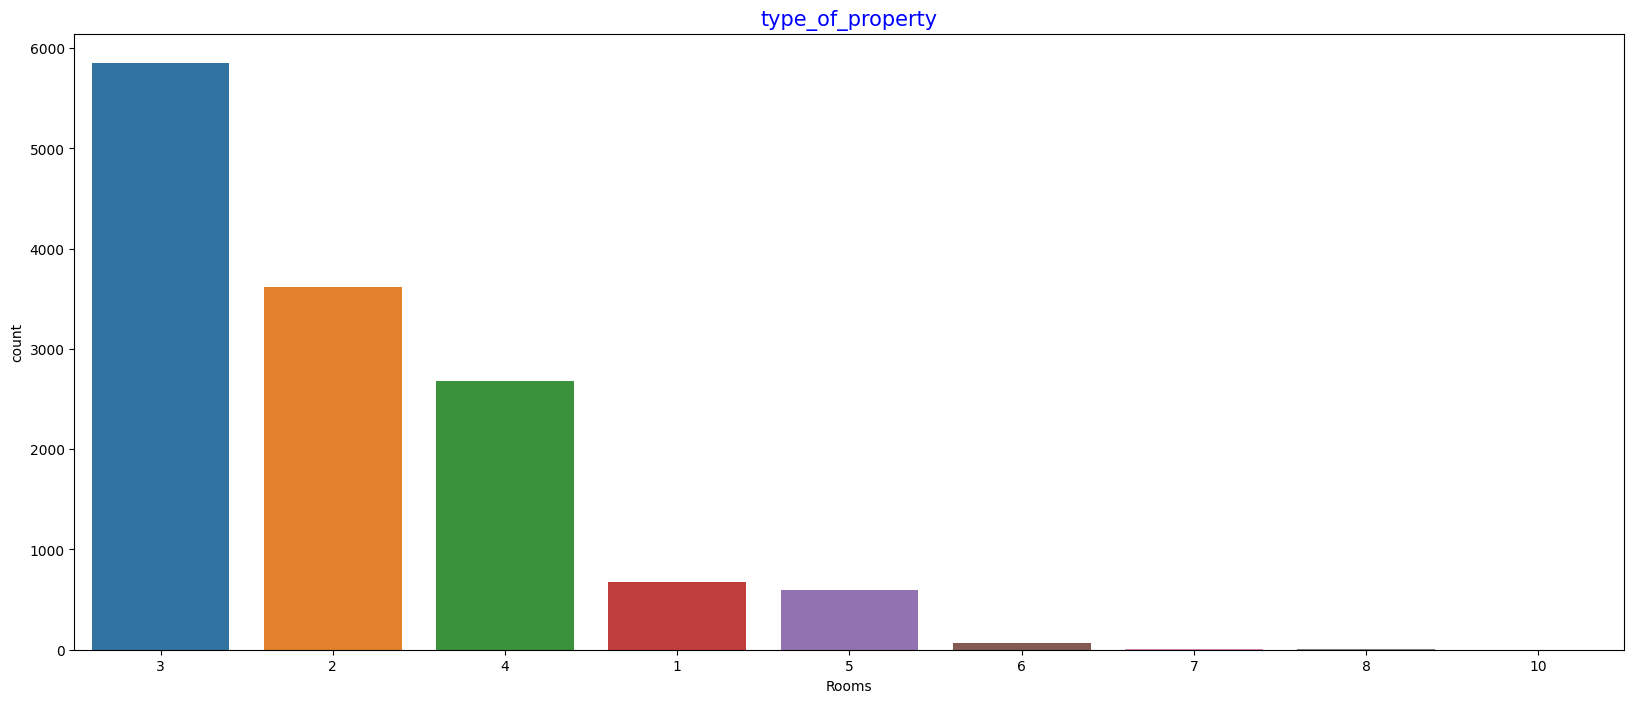

In [82]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Rooms', order=data['Rooms'].value_counts().index)
plt.title("type_of_property", color='blue', fontsize=15)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>]], dtype=object)

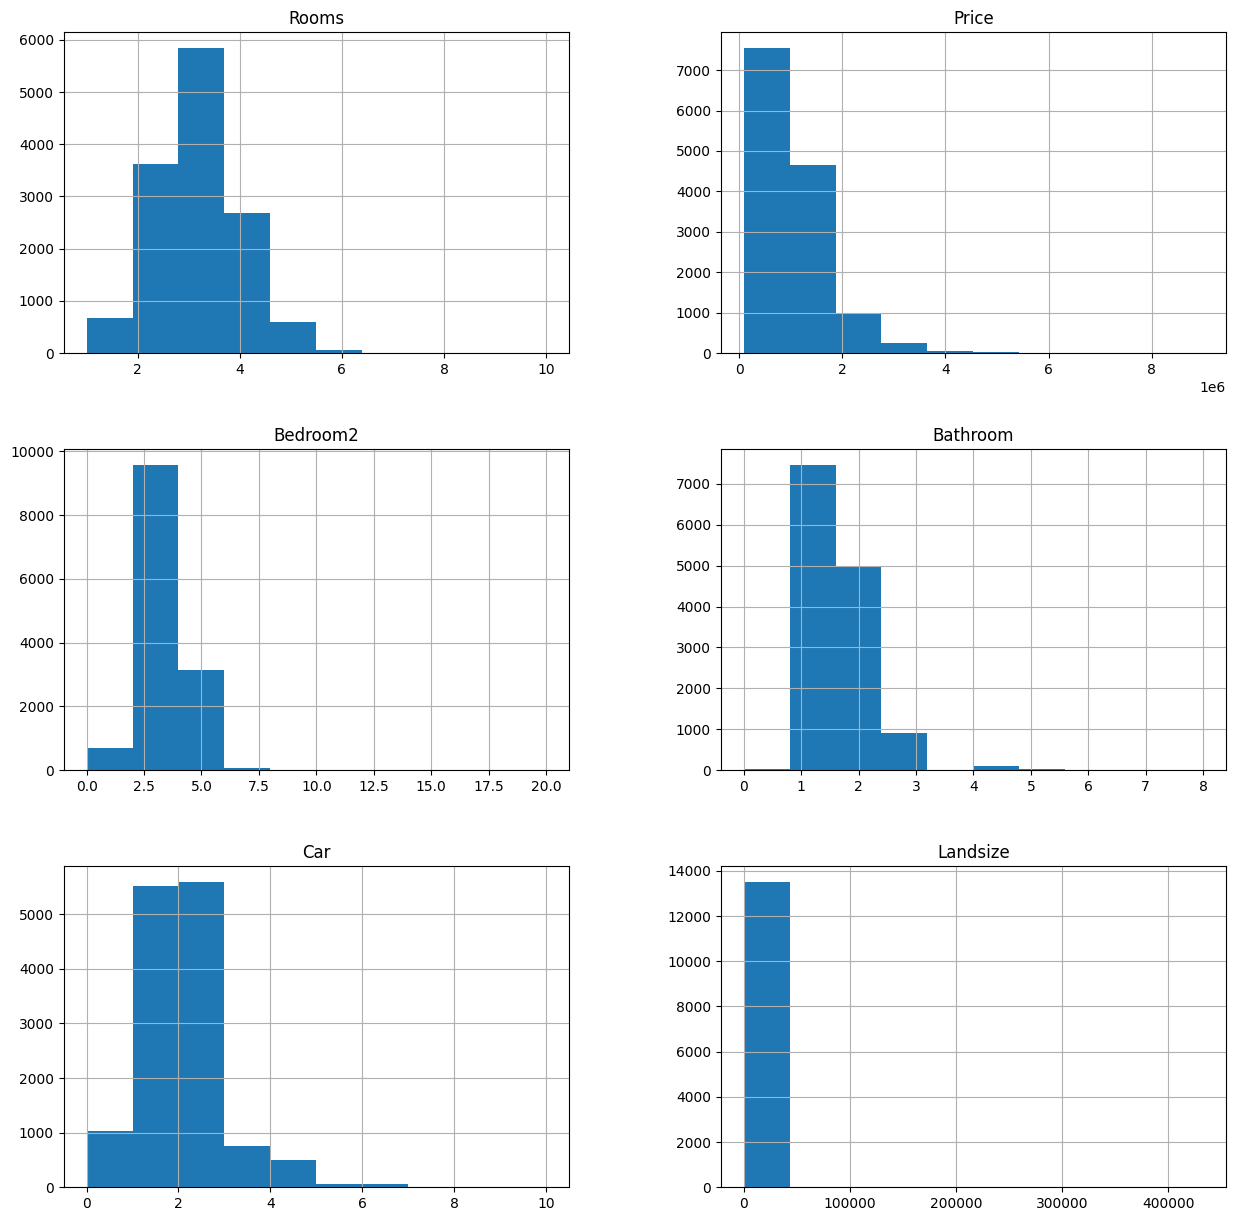

In [83]:
data.hist(figsize=(15,15))

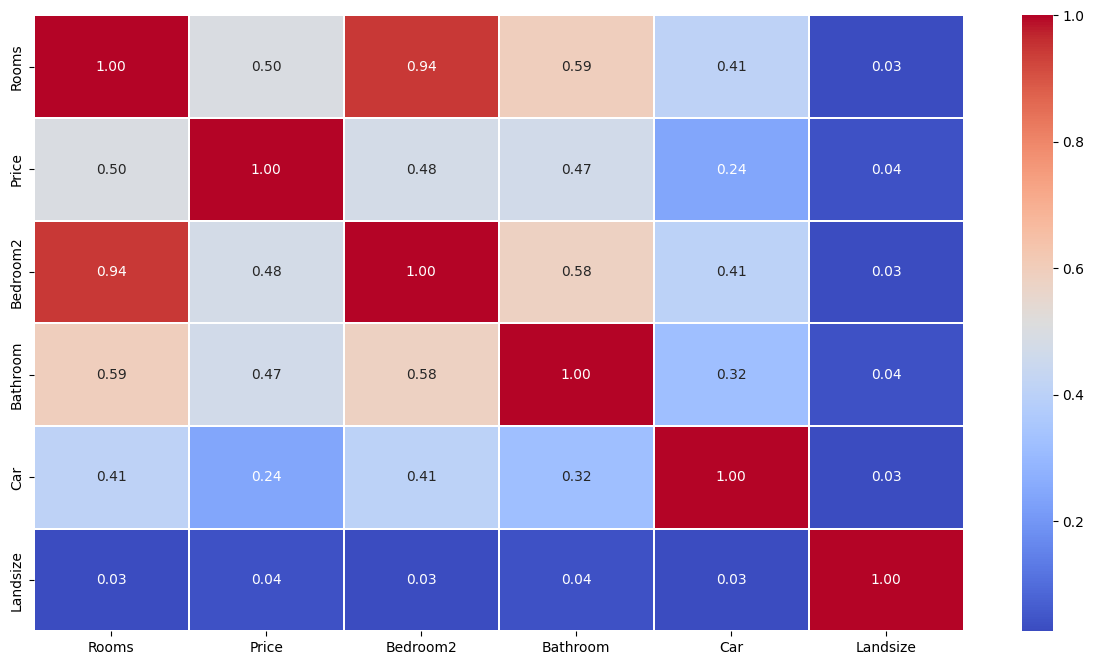

In [84]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

## Feature Selection


- Here, We need to convert categorical values to numerical values

In [85]:
data[categorical_features].value_counts()

Suburb            Type  CouncilArea  Regionname                
Reservoir         h     Darebin      Northern Metropolitan         220
Preston           h     Darebin      Northern Metropolitan         197
Bentleigh East    h     Glen Eira    Southern Metropolitan         156
Brunswick         h     Moreland     Northern Metropolitan         148
Richmond          h     Yarra        Northern Metropolitan         146
                                                                  ... 
North Warrandyte  h     Nillumbik    Eastern Metropolitan            1
Bonbeach          h     Kingston     South-Eastern Metropolitan      1
Notting Hill      h     Monash       Southern Metropolitan           1
                  u     Monash       Southern Metropolitan           1
Heathmont         u     Maroondah    Eastern Metropolitan            1
Name: count, Length: 722, dtype: int64

- Implementing `LabelEncoder` to convert categorical values to numerical values.

In [86]:
# Encoding ...
from sklearn.preprocessing import LabelEncoder
LabelEncoding= LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col]= LabelEncoding.fit_transform(data[col])

In [87]:
correlation_mat = data.corr()

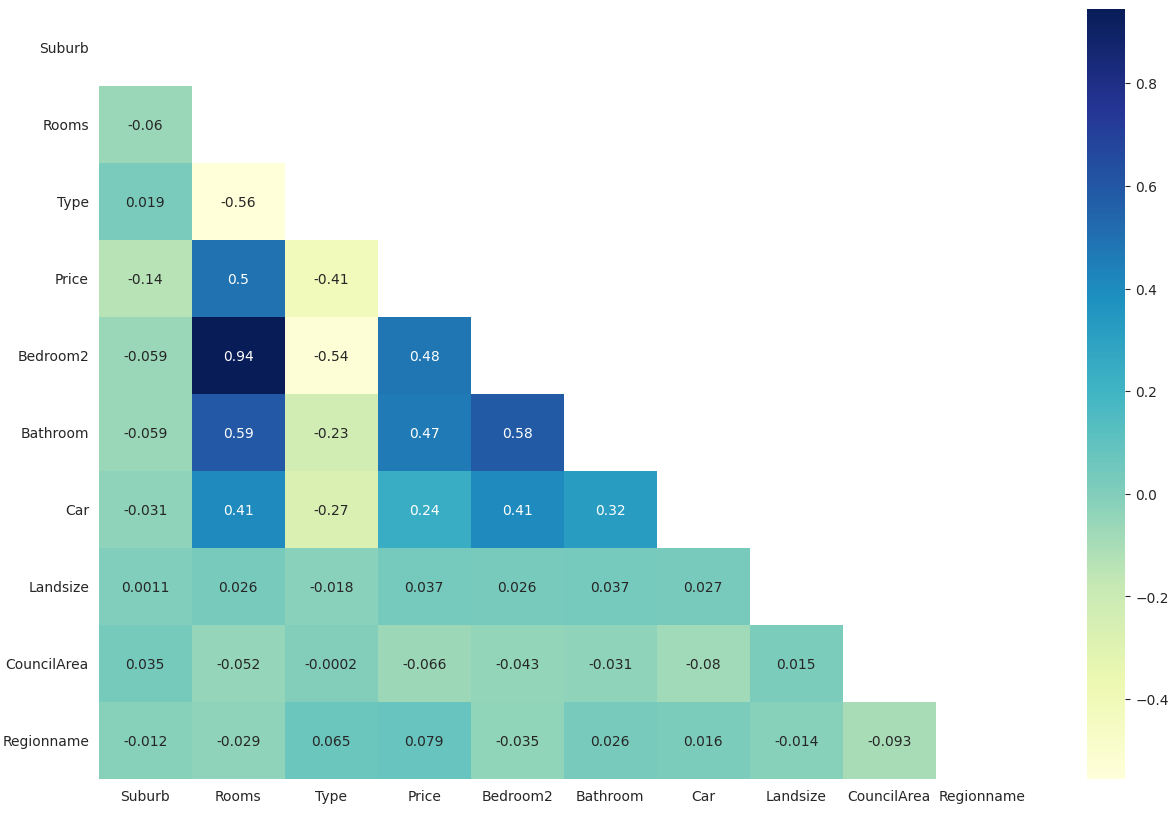

In [88]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    #f, ax = plt.subplots(figsize=(7,6))
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

- Creating Training Feature to train the model to predict the beter accuracy.

In [89]:

# training_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                         'YearBuilt', 'Lattitude', 'Longtitude']

training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('Price')

# show the final list
training_features

['Rooms',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Suburb',
 'Type',
 'CouncilArea',
 'Regionname']

In [90]:
for col in training_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Unique Records of Rooms = 9
Total Unique Records of Bedroom2 = 12
Total Unique Records of Bathroom = 9
Total Unique Records of Car = 11
Total Unique Records of Landsize = 1444
Total Unique Records of Suburb = 314
Total Unique Records of Type = 3
Total Unique Records of CouncilArea = 34
Total Unique Records of Regionname = 8


### Scalling Dataset

- Here, We are using `MinMaxScaler` to notmalize our dataset. Firstly, we need to import that class from `sklearn.preprocessing` package

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
# Let's Normalize the data for training and testing

minMaxNorm = MinMaxScaler()
minMaxNorm.fit(data[training_features])

MinMaxScaler()

Create `X` data and assignning from `training feature` columns from `data` and make it normalized.

In [93]:
X = minMaxNorm.transform(data[training_features]) 

In [94]:
X

array([[0.11111111, 0.1       , 0.125     , ..., 0.        , 0.93939394,
        0.28571429],
       [0.11111111, 0.1       , 0.125     , ..., 0.        , 0.93939394,
        0.28571429],
       [0.22222222, 0.15      , 0.25      , ..., 0.        , 0.93939394,
        0.28571429],
       ...,
       [0.22222222, 0.15      , 0.25      , ..., 0.        , 1.        ,
        0.85714286],
       [0.33333333, 0.2       , 0.125     , ..., 0.        , 1.        ,
        0.85714286],
       [0.33333333, 0.2       , 0.125     , ..., 0.        , 1.        ,
        0.85714286]])

In [95]:
Y = data['Price']  
Y

0        1480000
1        1035000
2        1465000
3         850000
4        1600000
          ...   
13513    1245000
13514    1031000
13515    1170000
13516    2500000
13517    1285000
Name: Price, Length: 13518, dtype: int64

## Splite Train and Test Dataset

Before we splite the data, We need to import train_test_split module from sklearn package

In [96]:
from sklearn.model_selection import train_test_split

### Splites the main data

- split data into training and validation data, for both features and target. The split is based on a random number generator.
- Supplying a numeric value to the random_state argument guarantees we get the same split eve run this script.

In [97]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0)

##### Check the train and test sized

In [98]:
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  13518
Train size:  (10138, 9) (10138,)
Test size:  (3380, 9) (3380,)


# Model Building

In [99]:
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error

In [100]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)

LinearRegression()

In [101]:
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted

array([1036508.19273711, 1343311.46030535, 1175078.26143994, ...,
        923203.05132538, 1012445.48135788, 2081056.59605353])

In [102]:
lr_model_score = lr_model.score(test_X, test_Y )

lr_model_score

0.3633148937800442

Now, Let's find the `mean absolute error` using test_Y and predicted vales

In [103]:
mae = mean_absolute_error(test_Y, lr_model_predicted)

###### Store model and it's predictoin score in dataframe that we created below the model building section

In [104]:
print('model_name',lr_model.__class__.__name__)
print('prediction_score', lr_model_score*100,"%")
print('mean_absolute_error', mae)

model_name LinearRegression
prediction_score 36.33148937800442 %
mean_absolute_error 346530.6128336444


Now, let's see the model_summary dataframe

### Decision Tree Regressor Model

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
Dtree_model = DecisionTreeRegressor(random_state=1)

In [107]:
Dtree_model.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=1)

In [108]:
Dtree_model_predicted = Dtree_model.predict(test_X)

In [109]:
Dtree_model_score = Dtree_model.score(test_X, test_Y)
Dtree_model_score

0.4573070046847124

In [110]:
mae = mean_absolute_error(Dtree_model_predicted, test_Y)

In [111]:
print('model_name',Dtree_model.__class__.__name__)
print('prediction_score', Dtree_model_score)
print('mean_absolute_error', mae)

model_name DecisionTreeRegressor
prediction_score 0.4573070046847124
mean_absolute_error 270285.5038817781


### Random Forest Regressor Model

Here, We implement other models from ensemble package.

In [112]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor

In [113]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [114]:
RFRModel.fit(train_X, train_Y)

RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [115]:
RFRModel_predicted = RFRModel.predict(test_X)

In [116]:
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score

0.6368263627944131

In [117]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7]}

rfr_model = RandomForestRegressor(random_state=35)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(train_X, train_Y)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 7, 'n_estimators': 200}


In [118]:
mae = mean_absolute_error(RFRModel_predicted, test_Y)

In [119]:
print('model_name',RFRModel.__class__.__name__)
print('prediction_score', RFRModel_score)
print('mean_absolute_error', mae)

model_name RandomForestRegressor
prediction_score 0.6368263627944131
mean_absolute_error 250660.5135431359


In [120]:
# Creating Model
BGR_model = BaggingRegressor()

# Model Fitting
BGR_model.fit(train_X, train_Y)

# Model Prediction
BGR_model_predicted = BGR_model.predict(test_X)

# Model Score
BGR_model_score = BGR_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, BGR_model_predicted)

In [121]:
print(test_X)

[[0.33333333 0.2        0.125      ... 0.         0.6969697  0.28571429]
 [0.22222222 0.15       0.25       ... 0.         0.63636364 0.85714286]
 [0.22222222 0.15       0.25       ... 0.         1.         0.        ]
 ...
 [0.22222222 0.15       0.125      ... 0.         0.84848485 0.        ]
 [0.22222222 0.15       0.125      ... 0.         1.         0.71428571]
 [0.66666667 0.35       0.375      ... 0.         0.6969697  0.28571429]]


In [122]:
print('model_name',BGR_model.__class__.__name__)
print('prediction_score', BGR_model_score)
print('mean_absolute_error', mae)

model_name BaggingRegressor
prediction_score 0.6737939300649225
mean_absolute_error 219993.5399390835


### Ada Boost Regressor Model

In [123]:
    
# Creating Model
ADB_model = AdaBoostRegressor()

# Model Fitting
ADB_model.fit(train_X, train_Y)

# Model Prediction
ADB_model_predicted = ADB_model.predict(test_X)

# Model Score
ADB_model_score = ADB_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, ADB_model_predicted)

In [124]:
print('model_name',ADB_model.__class__.__name__)
print('prediction_score', ADB_model_score)
print('mean_absolute_error', mae)

model_name AdaBoostRegressor
prediction_score -0.19220250695649188
mean_absolute_error 547682.642743232


### Gradient Boosting Regressor Model

In [125]:
# Creating Model
GBR_model = GradientBoostingRegressor(n_estimators=150, random_state=1)

# Model Fitting
GBR_model.fit(train_X, train_Y)

# Model Prediction
GBR_model_predicted = GBR_model.predict(test_X)

# Model Score
GBR_model_score = GBR_model.score(test_X, test_Y)

# find Mean Absolute Error
mae = mean_absolute_error(test_Y, GBR_model_predicted)

In [126]:
print('model_name',GBR_model.__class__.__name__)
print('prediction_score', GBR_model_score)
print('mean_absolute_error', mae)

model_name GradientBoostingRegressor
prediction_score 0.6798409854329732
mean_absolute_error 230919.55746009463


In [127]:
# Random Forest Regressor Model
from xgboost import XGBRegressor

In [128]:
XGBR_model = XGBRegressor()

In [129]:
XGBR_model.fit(train_X, train_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [130]:
XGBR_model_predicted = XGBR_model.predict(test_X)

In [131]:
XGBR_model_score = XGBR_model.score(test_X, test_Y)
XGBR_model_score

0.7523043409612985

In [132]:
mae = mean_absolute_error(test_Y, XGBR_model_predicted)
mae

191808.38980214496

In [133]:
print('model_name',XGBR_model.__class__.__name__)
print('prediction_score', XGBR_model_score)
print('mean_absolute_error', mae)
 

model_name XGBRegressor
prediction_score 0.7523043409612985
mean_absolute_error 191808.38980214496


Let's implement some hyper param tunning using `n_estimators=500, max_depth=10, learning_rate=0.05`.

In [134]:
XGBR_model_500 = XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05)
XGBR_model_500.fit(train_X, train_Y)

XGBR_model_500_predicted = XGBR_model_500.predict(test_X)

XGBR_model_500_score = XGBR_model_500.score(test_X, test_Y)
print(XGBR_model_500_score)

mae = mean_absolute_error(test_Y, XGBR_model_500_predicted)
print(mae)

0.7287121148572449
200791.91135817306


In [135]:
print('model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05')
print('prediction_score', XGBR_model_500_score)
print('mean_absolute_error', mae)

model_name: XGBRegressor(n_estimators=500, max_depth=10, learning_rate=0.05
prediction_score 0.7287121148572449
mean_absolute_error 200791.91135817306


# HYPER PARAMS TUNNING 

- Using GridSearchCV.


In [136]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

In [137]:
xgbr_model = XGBRegressor() # {'objective': 'reg:squarederror' }
params = {
    'n_estimators': [110, 120, 130, 140], 
    'learning_rate': [ 0.05, 0.075, 0.1],
    'max_depth': [ 7, 9],
    'reg_lambda': [0.3, 0.5]
}

xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)
xgb_reg.fit(train_X, train_Y)

xgbr_model_score = xgb_reg.best_score_
xgbr_model_pred = xgb_reg.predict(test_X)

mae = mean_absolute_error(test_Y, xgbr_model_pred)

print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
print("mean_absolute_error :", mae)

Best score: 0.719
Best parameters set: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.3}
mean_absolute_error : 194059.8150147929


In [138]:
print('model_name: XGBRegressor_HyperParamsTunning')
print('prediction_score', xgbr_model_score)
print('mean_absolute_error', mae)

model_name: XGBRegressor_HyperParamsTunning
prediction_score 0.7193983028896783
mean_absolute_error 194059.8150147929


In [139]:
rfr_model = RandomForestRegressor(random_state=35)

rfr_params_grid = {
    'n_estimators' : [600,750,800,850],
    'max_depth' : [7],
    'max_features': [5],
    'min_samples_leaf' : [3],
    'min_samples_split' : [4, 6 ,9]
}

gscv_rfr_cv = GridSearchCV(estimator=rfr_model, 
                                      param_grid=rfr_params_grid,
                                      cv = 5 ,
                                      n_jobs = -1,
                                      verbose = 5)

gscv_rfr_cv.fit(train_X, train_Y)

gscv_rfr_cv_score = gscv_rfr_cv.best_score_

gscv_rfr_cv_pred = gscv_rfr_cv.predict(test_X)

mae = mean_absolute_error(test_Y, gscv_rfr_cv_pred)

print("Best score: %0.3f" % gscv_rfr_cv.best_score_)
print("Best parameters set:", gscv_rfr_cv.best_params_)
print("mean_absolute_error :", mae)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
print('model_name: Random Forest Regressor Hyper Params Tunning')
print('prediction_score',gscv_rfr_cv_score)
print('mean_absolute_error', mae)

model_name: Random Forest Regressor Hyper Params Tunning
prediction_score 0.4825132755438603
mean_absolute_error 603.4515346809411
